# <center>Analyse du jeux de données de Google PlayStore (R)</center> 

> ## Importation des packages nécessaires : 

In [2]:
#importing packages to use
library(dplyr)
library(plyr)
library(ggplot2)
library(reshape2)
options(warn=-1)
library(tidyverse)
library(magrittr)
library(readr)
library(stringr)
library(scales)

> ## Lecture des données :

In [3]:
# Loading the Data
df = read.csv("/Users/abdelilahmoulida/Desktop/googleplaystore/googleplaystore.csv")

In [4]:
# 5 premières rows du dataframe
head(df)

# dimensions
dim(df)
print("10841 observations and 13 variables")

App                                                Category       Rating
1 Photo Editor & Candy Camera & Grid & ScrapBook     ART_AND_DESIGN 4.1   
2 Coloring book moana                                ART_AND_DESIGN 3.9   
3 U Launcher Lite – FREE Live Cool Themes, Hide Apps ART_AND_DESIGN 4.7   
4 Sketch - Draw & Paint                              ART_AND_DESIGN 4.5   
5 Pixel Draw - Number Art Coloring Book              ART_AND_DESIGN 4.3   
6 Paper flowers instructions                         ART_AND_DESIGN 4.4   
  Reviews Size Installs    Type Price Content.Rating Genres                   
1 159     19M  10,000+     Free 0     Everyone       Art & Design             
2 967     14M  500,000+    Free 0     Everyone       Art & Design;Pretend Play
3 87510   8.7M 5,000,000+  Free 0     Everyone       Art & Design             
4 215644  25M  50,000,000+ Free 0     Teen           Art & Design             
5 967     2.8M 100,000+    Free 0     Everyone       Art & Design;Creativity  
6 167     5.6M 50,000+     Free 0     Everyone       Art & Design             
  Last.Updated     Current.Ver        Android.Ver 
1 January 7, 2018  1.0.0              4.0.3 and up
2 January 15, 2018 2.0.0              4.0.3 and up
3 August 1, 2018   1.2.4              4.0.3 and up
4 June 8, 2018     Varies with device 4.2 and up  
5 June 20, 2018    1.1                4.4 and up  
6 March 26, 2017   1.0                2.3 and up

[1] 10841    13

[1] "10841 observations and 13 variables"


In [5]:
# Résumez les différentes variables afin que nous ayons une idée de ce avec quoi nous travaillons
summary(df)

                                                App                Category   
 ROBLOX                                           :    9   FAMILY      :1972  
 CBS Sports App - Scores, News, Stats & Watch Live:    8   GAME        :1144  
 8 Ball Pool                                      :    7   TOOLS       : 843  
 Candy Crush Saga                                 :    7   MEDICAL     : 463  
 Duolingo: Learn Languages Free                   :    7   BUSINESS    : 460  
 ESPN                                             :    7   PRODUCTIVITY: 424  
 (Other)                                          :10796   (Other)     :5535  
     Rating          Reviews                     Size             Installs   
 Min.   : 1.000   0      : 596   Varies with device:1695   1,000,000+ :1579  
 1st Qu.: 4.000   1      : 272   11M               : 198   10,000,000+:1252  
 Median : 4.300   2      : 214   12M               : 196   100,000+   :1169  
 Mean   : 4.193   3      : 175   14M               : 194

> ## Traitement des données : 
> ### <b style="font-size:14pt;"><u>Analyse univariées :</u></b>

### Category

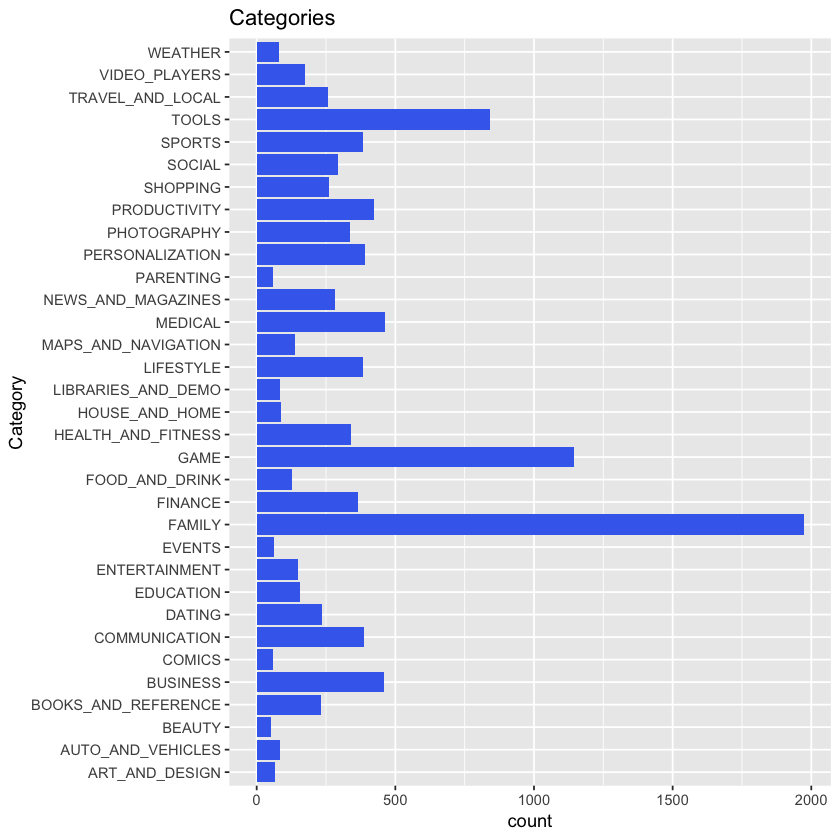

In [6]:
# enlevement de la category 1.9
df = subset(df, Category != '1.9')

# traçage d'un bar graph pour Categories
ggplot(aes(x = Category), data = df)+geom_bar(fill = 'royalblue2')+coord_flip()+ggtitle("Categories")

> <b><i style="font-size:14pt;">Il y a plus d'applications dans la catégorie Famille que dans toute autre catégorie, suivie des catégories Game et Tools. Il y a moins de 500 applications pour la plupart des catégories de la liste.</i></b>

### Rating

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   4.000   4.300   4.192   4.500   5.000    1474 

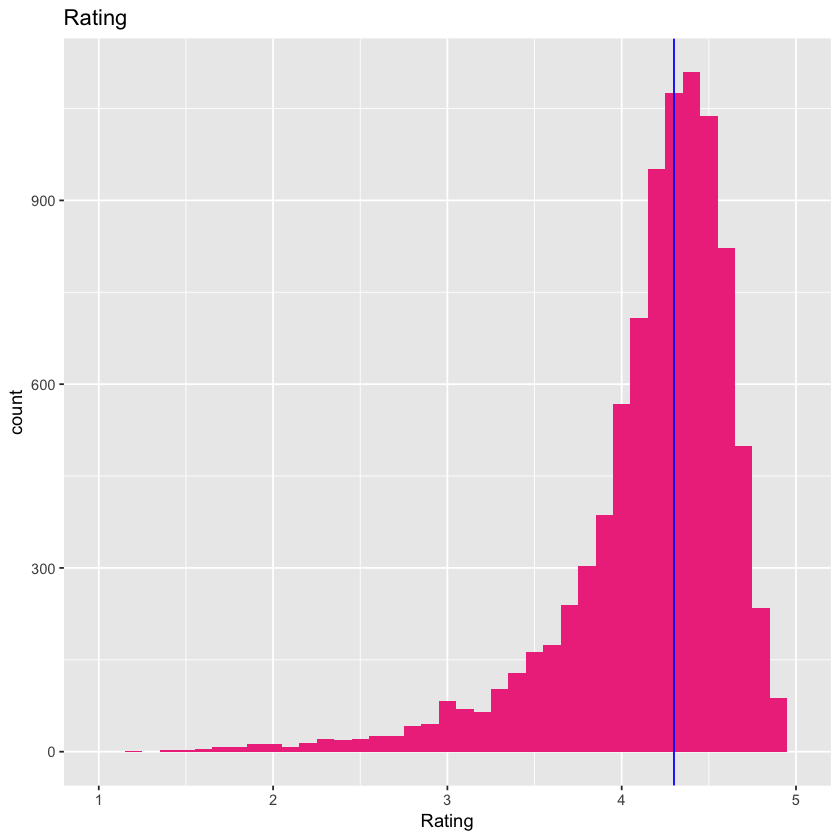

In [7]:
# la médiane
med = median(subset(df$Rating, df$Rating >= 0.01))

# histogramme pour la distribution des Rating dans le jeu de données
ggplot(aes(x = Rating), data = df )+
  geom_histogram(binwidth = 0.1, fill = 'violetred2')+
  xlim(1,5)+ 
  geom_vline(xintercept = med, col = 'blue')+
  ggtitle('Rating')

summary(df$Rating)

> <b><i style="font-size:14pt;">La plupart des applications sont cotées au-dessus de 4,0 et environ la moitié sont cotées entre 4,3 et 5.
(la ligne bleue est la médiane)</i></b>

In [8]:
print("Nombre d'applications avec notes complètes: ") 
count(df$Rating[df['Rating'] == 5 ])

[1] "Nombre d'applications avec notes complètes: "


x  freq
1  5  274
2 NA 1474

### Reviews

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    1157    2747    2744    4320    6002 

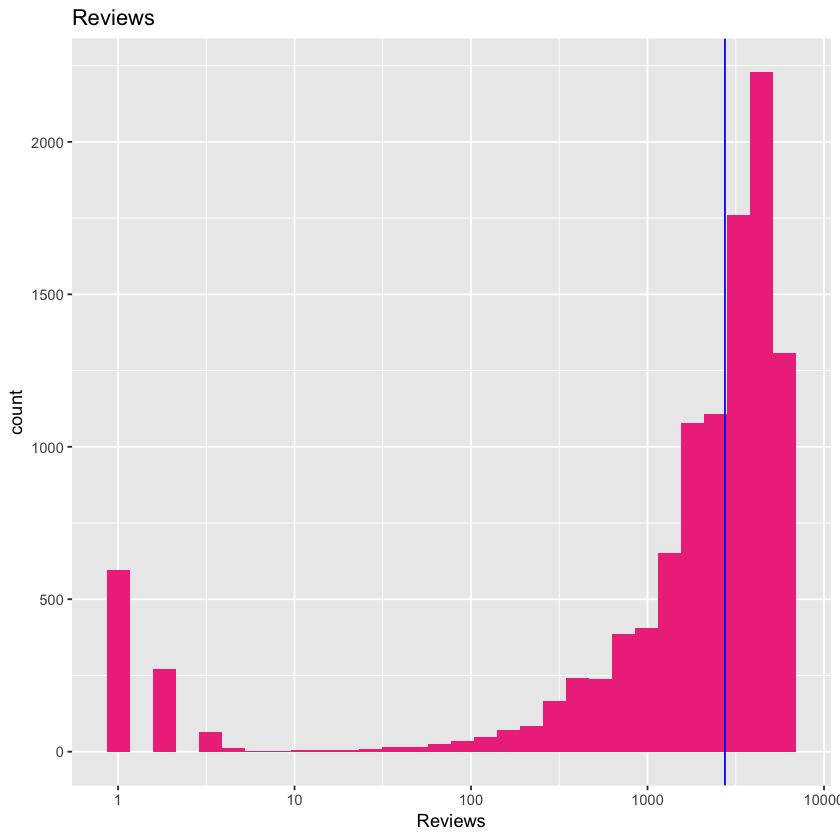

In [9]:
# changement de la colonne Reviews en numbers
df$Reviews = as.numeric(df$Reviews)

# Histogramme
ggplot(aes(x = Reviews), data = df)+ 
  geom_histogram(fill = 'violetred2', bins=30)+
  scale_x_log10()+
  geom_vline(xintercept = median(df$Reviews), color = 'blue')+
  ggtitle('Reviews')

# summary
summary(df$Reviews)

> <b><i style="font-size:14pt;">Le nombre de Reviews suit une distribution biaisée à gauche. Environ la moitié des applications ont plus de 2747 critiques (la ligne bleue est la médiane).</i></b>

## Type

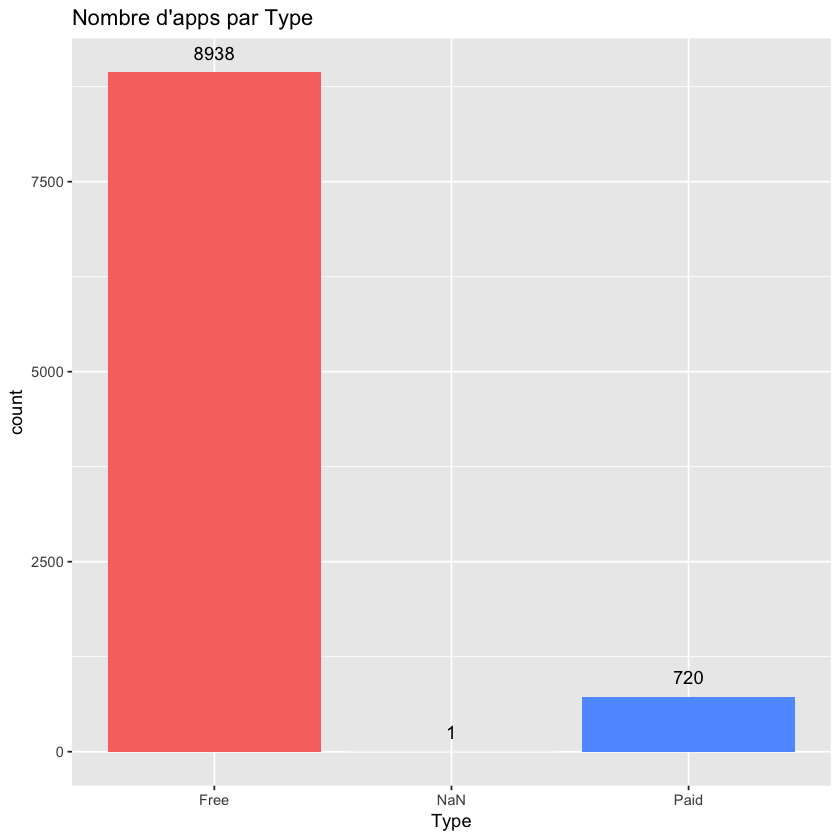

In [10]:
#str(df$Type)
#summary(df$Type)
## There is one row with NaN value, let's check this row
#df[df$Type=='NaN',]
## As shown, price of this app is equal to 0 which means the App is Free
## change the value of Type to Free
#df[df$Type=='NaN',]$Type <- 'Free'

ggplot(df[unique(df$App),], aes(x = Type, fill = Type)) +
  geom_bar() +
  geom_text(stat='count', aes(label=..count..), vjust=-1) +
  labs(title = "Nombre d'apps par Type") +
  guides(fill = FALSE)

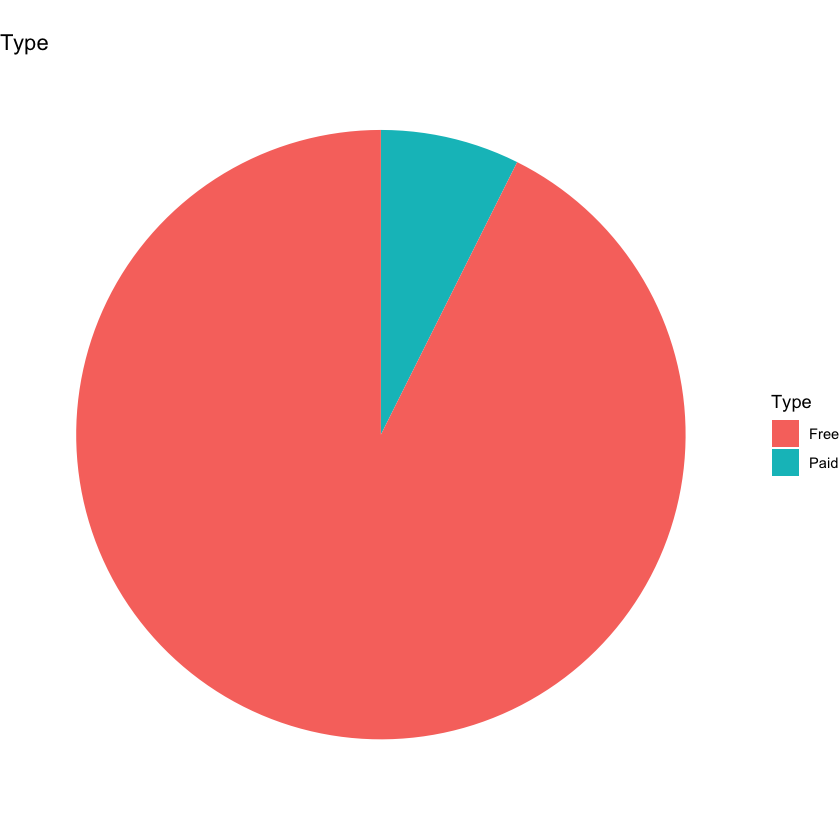

In [11]:
# il y a de types paid and free
df_type = subset(df, (Type == 'Free' | Type == 'Paid'))

temp <- df_type%>%
  group_by(Type)%>%
  dplyr::summarise(n = n())

# piechart
ggplot(aes(x = '', y = n, fill = Type), data = temp )+
  geom_bar(stat = 'identity')+
  coord_polar('y', start = 0)+
  theme_void()+
  ggtitle('Type')

> <b><i style="font-size:14pt;">There are a lot more free apps in the app store than paid apps. But we need to keep in mind that some of these free apps have in app purchases.</i></b>

## Price

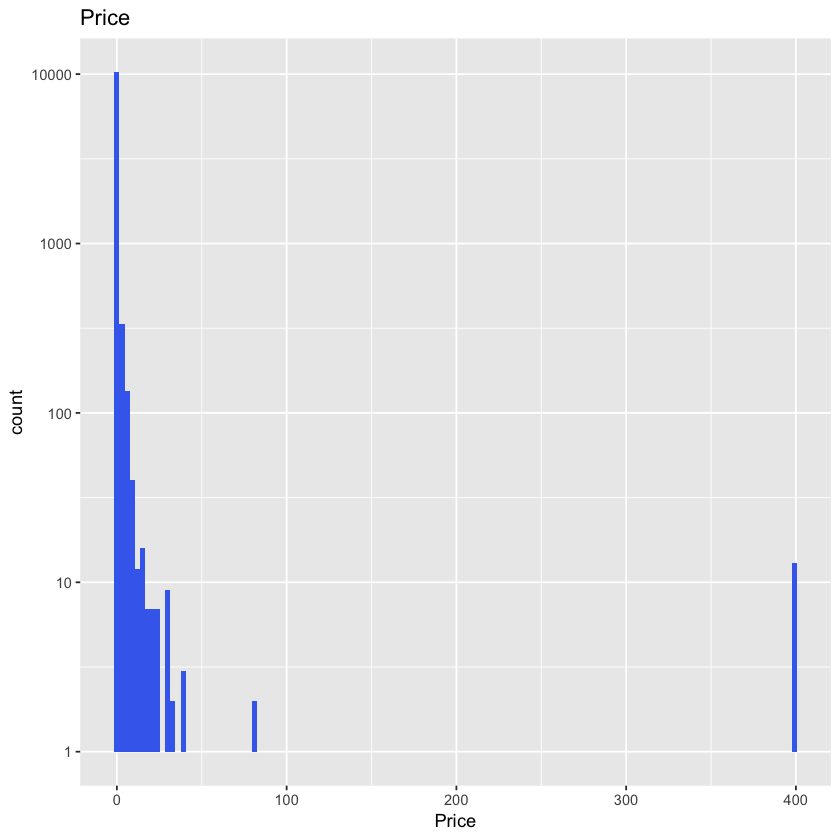

In [12]:
# enlevement du caractère $
df$Price = as.numeric(gsub("\\$", "", df$Price))

ggplot(aes(x = Price), data = df) + 
    geom_histogram(fill = 'royalblue2', binwidth = 3)+
    scale_y_log10()+ggtitle('Price')

> <b><i style="font-size:14pt;">La plupart des applications ne coûtent rien et nous constatons qu'il y a des valeurs aberrantes autour de 400 dollars, et normalement c'est l'app la plus chère 'I'm Rich'.</i></b>

### ContentRating

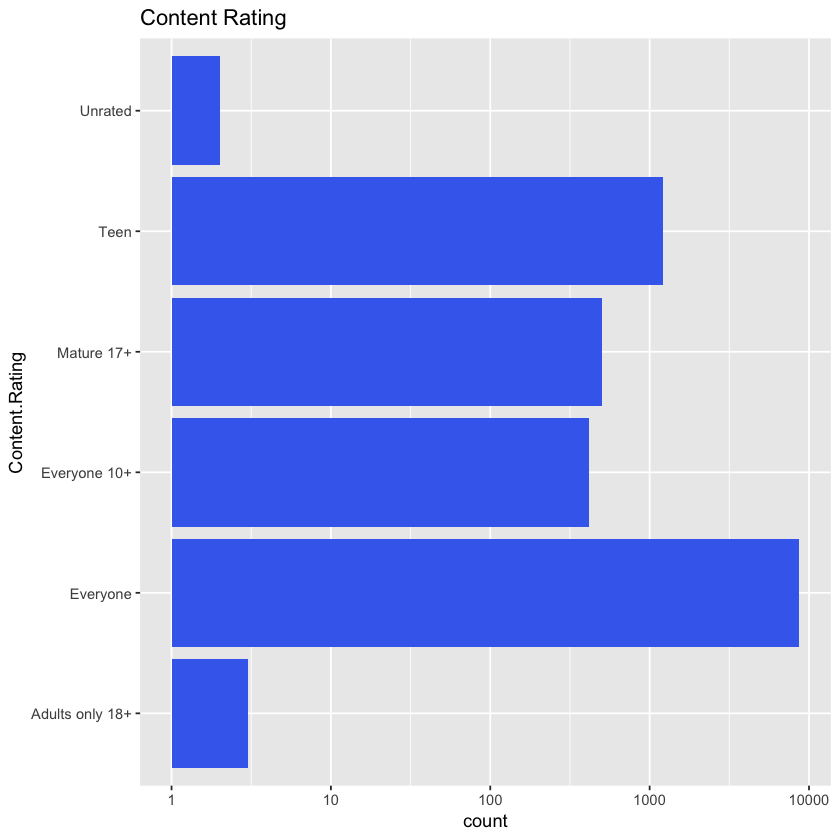

In [13]:
# barplot
ggplot(aes(x = Content.Rating), data = df)+
  geom_bar(fill = 'royalblue2')+
  coord_flip()+
  scale_y_log10()+
  ggtitle('Content Rating')

> <b><i style="font-size:14pt;">La plupart des applications conviennent aux personnes de moins de 18 ans. Le nombre d'applications qui sont évaluées (Rated) pour tout le monde est supérieur à toutes les autres évaluations de contenu combinées.</i></b>

### Android version

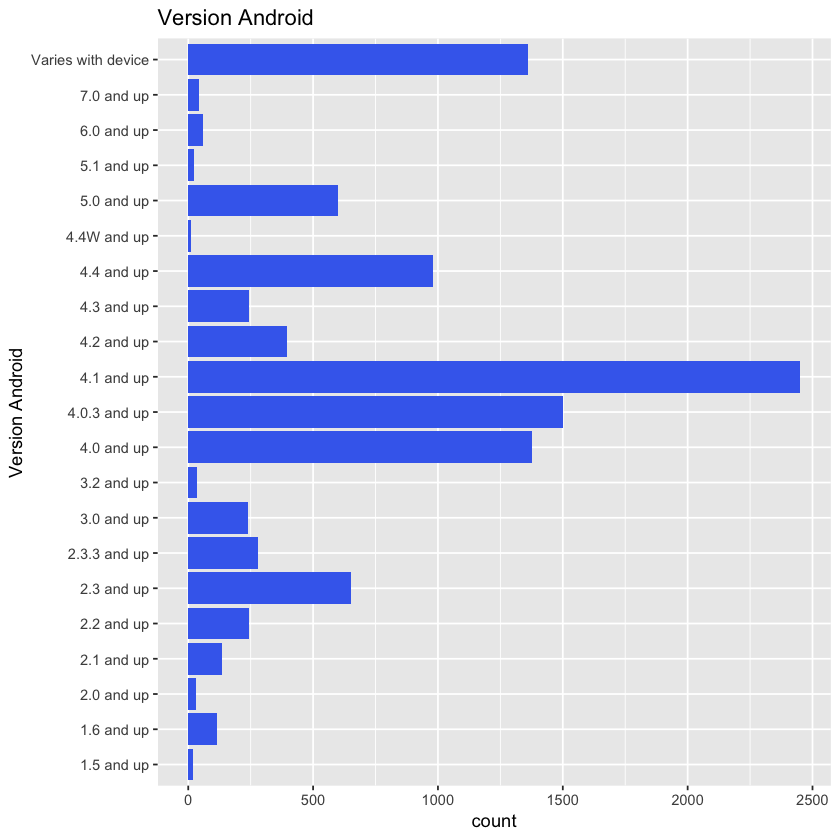

In [14]:
# création d'un dataset temporaire
temp <-df%>%
  group_by(Android.Ver)%>%
  dplyr::summarise(n = n())

ver_df<-subset(temp, (Android.Ver != 'NaN' & n >10))

# barplot
ggplot(aes(x = Android.Ver, y = n), data = ver_df)+
geom_bar(stat = 'identity', fill = 'royalblue2')+
coord_flip()+
ylab('count')+
xlab('Version Android')+
ggtitle('Version Android')

### Size

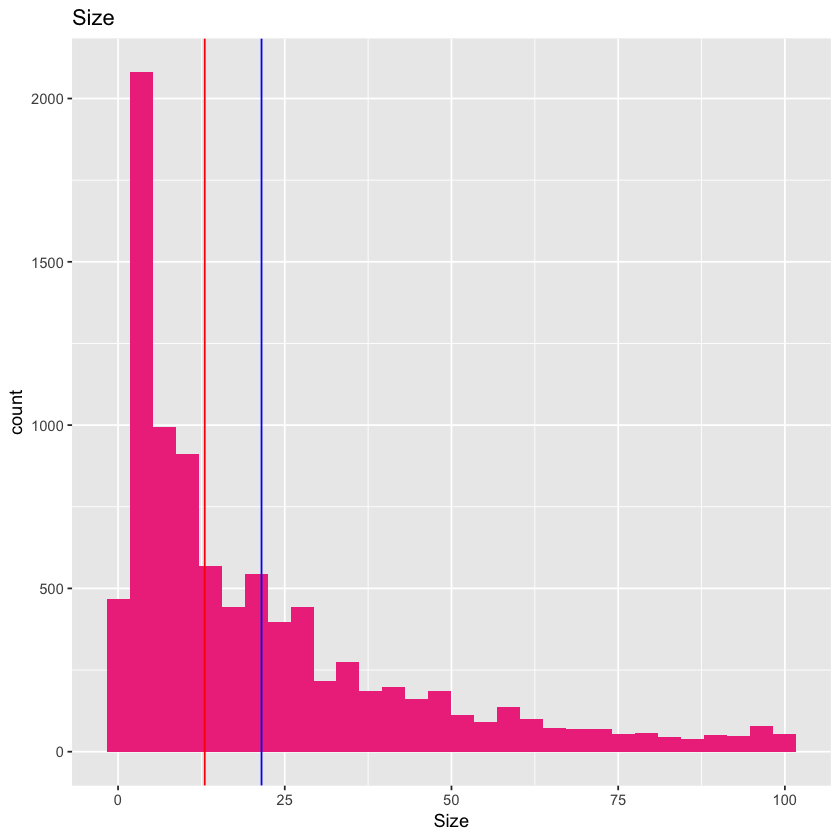

In [15]:
df_size = subset(df, Size != 'Varies with device')

# enelvement du caractère et conversion en M(/1024)afin d'avoir des valeurs numérique
condition = grepl('M', df_size$Size)
if_true = as.numeric(gsub("[a-zA-Z ]", "" , df_size$Size))
if_false = as.numeric(gsub("[a-zA-Z ]", "", df_size$Size))/1024

df_size$Size = ifelse(condition == TRUE, if_true,if_false)

# plot
ggplot(aes(x = round(Size)), data = df_size)+
  geom_histogram(fun.y = count, geom ='line', fill = 'violetred2', bins=30)+
  geom_vline(xintercept = median(subset(df_size,!is.na(df_size$Size))$Size), col = 'red')+
  geom_vline(xintercept = mean(subset(df_size,!is.na(df_size$Size))$Size), col = 'blue')+
  ggtitle('Size')+
  xlab('Size')

### Genres

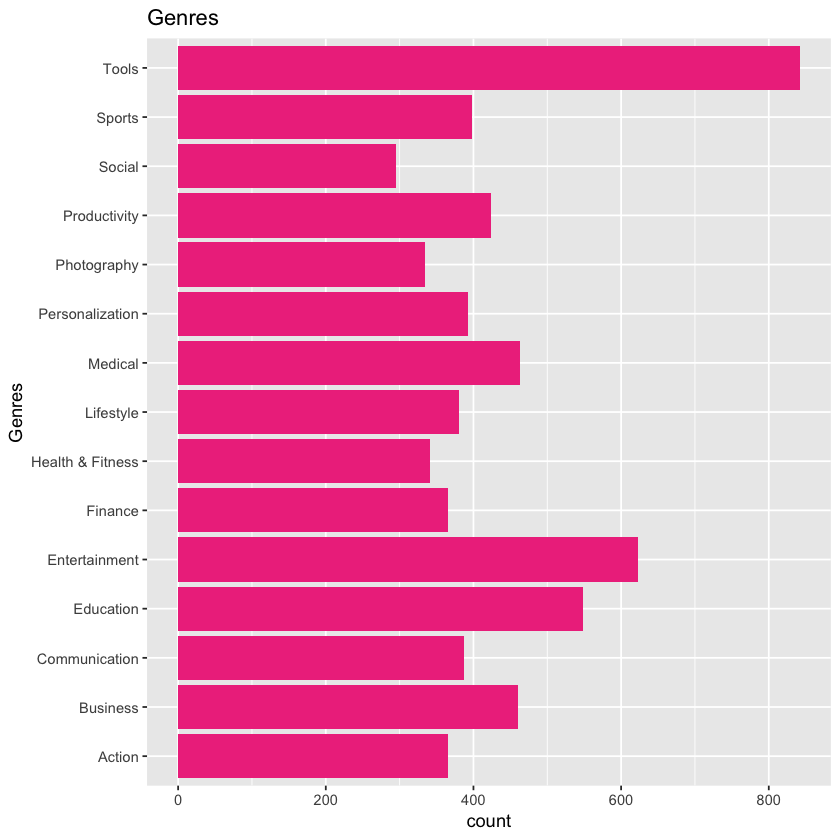

In [16]:
# Plotting les Genres des apps les plus populaires

# groupement des Genres pour trouver celui le plus fréquent 
topgenres = group_by(df, Genres)%>%
  dplyr::summarise(n = n())%>%
  arrange(desc(n))

# enlevement des Genres moins fréquent
# la variable topgenres je vais l'utiliser dans l'anlyse bivariés
topgenres = head(topgenres,15)
mask= df$Genres %in% topgenres$Genres
topgenres = df[mask,]

# barplot
ggplot(aes(x = Genres), data = topgenres)+
  geom_bar(fill = 'violetred2')+
  coord_flip()+
  ggtitle('Genres')

### Installs

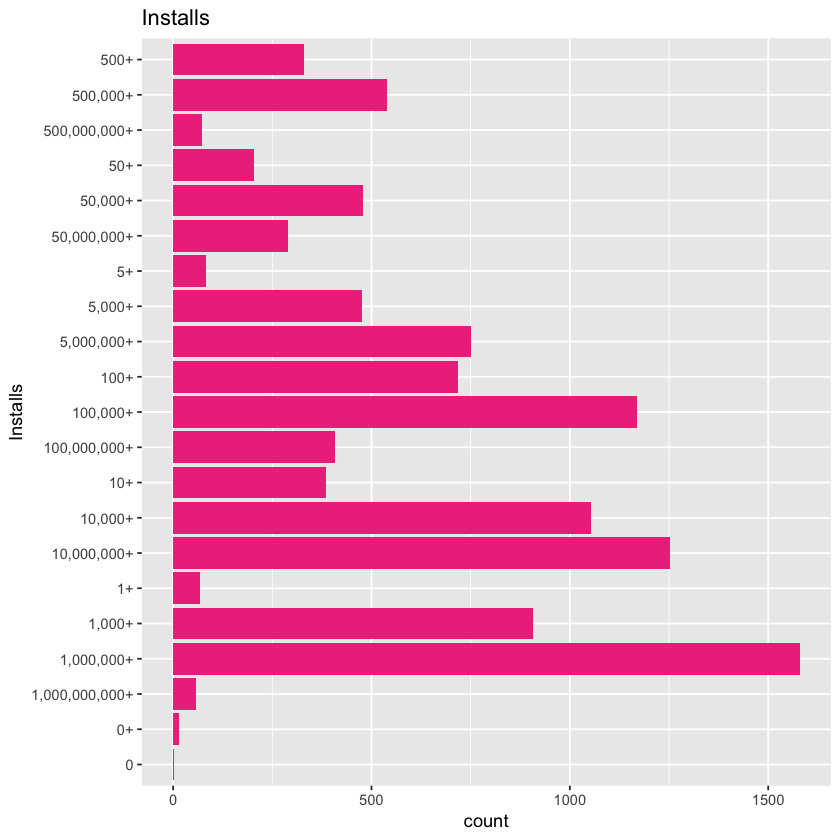

In [17]:
# Cleaning la colonne Installs
df = subset(df, df$Installs != 'Free')

# plotting a bargraph pour le nombre d'installs pour chaque Level
ggplot(aes(x = Installs), data = df )+geom_bar(fill = 'violetred2')+coord_flip()+ggtitle('Installs')

> ### <b style="font-size:14pt;"><u>Analyses multivariées :</u></b>

### <b><i style="font-size:14pt;">- La relation entre Rating et les autres éléments colonnes :</i></b>

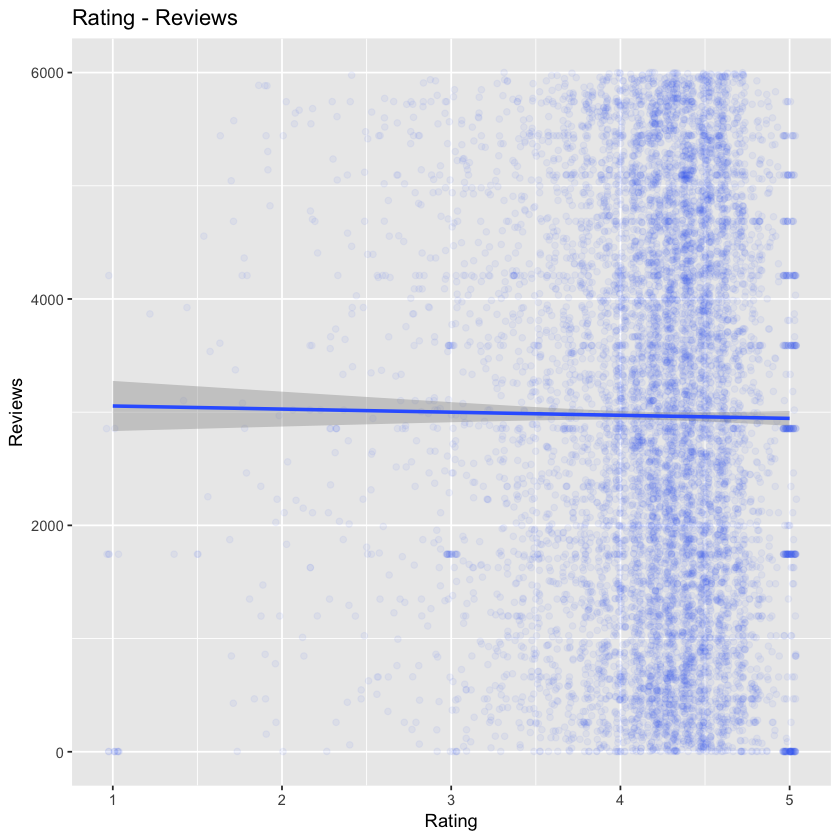

In [18]:
# rating - reviews
ggplot(aes(y =Reviews, x=Rating), data = df)+
  geom_jitter(alpha = 0.06, color = 'royalblue2')+
  geom_smooth(method = 'lm')+
  ggtitle('Rating - Reviews')

> <b><i style="font-size:14pt;">La variabilité de Rating d'une application ne s'explique pas par le nombre de Review.</i></b>

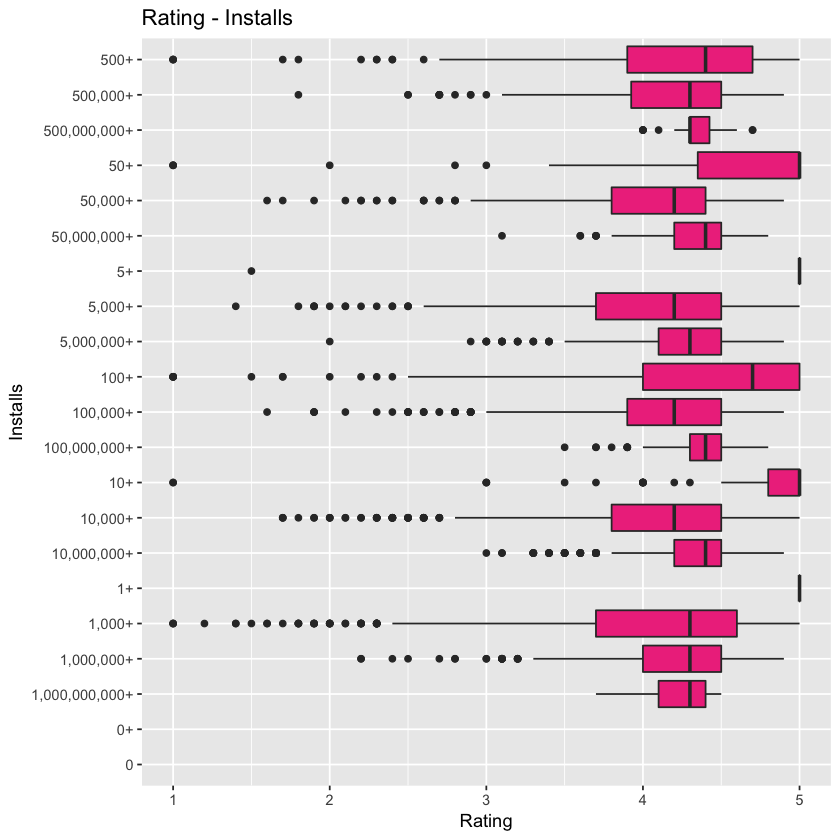

In [19]:
# Rating - Installs
ggplot(aes(x =Installs , y =Rating ), data = df)+
  geom_boxplot(fill = 'violetred2')+
  coord_flip()+
  ggtitle('Rating - Installs')

> <b><i style="font-size:14pt;">On peut voir que la note médiane sera supérieure à 4 quel que soit le nombre de fois qu'une application a été installée.</i></b>

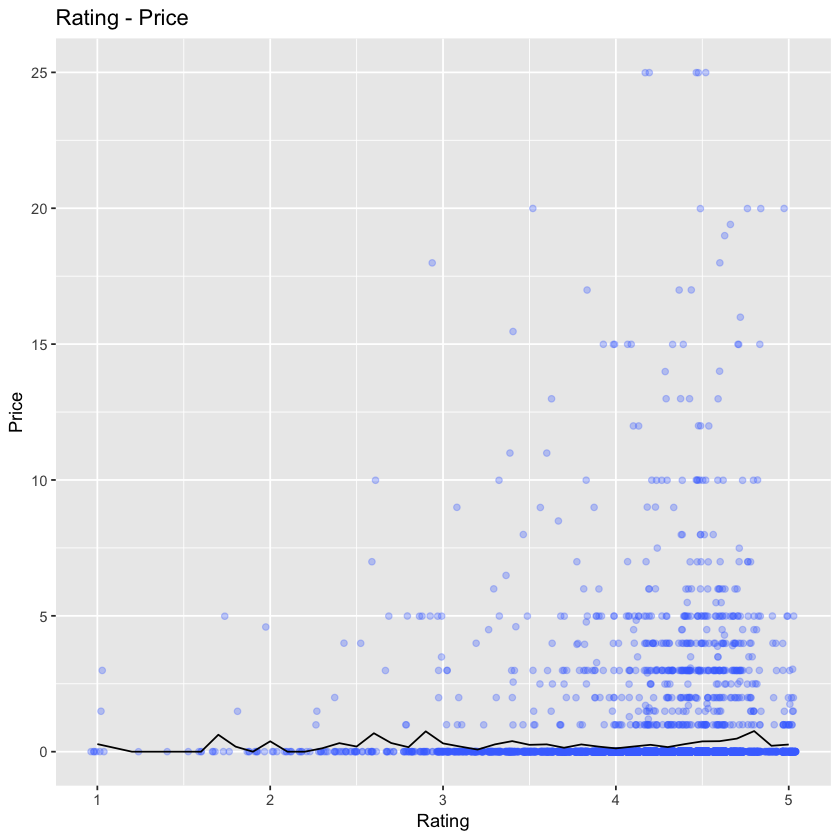

In [20]:
# Rating - Price
ggplot(aes(x = Rating , y = Price), data = df)+
  geom_jitter(alpha = 0.3, color = 'royalblue1')+
  ylim(0,25)+
  geom_line(stat = 'summary', fun.y = mean)+
  ggtitle('Rating - Price')

> <b><i style="font-size:14pt;">Ici, nous voyons que le prix moyen est très proche de 0, ceci est dû au fait que la plupart des applications sont gratuites. Pour mieux comprendre la relation entre la notation et le Prix, nous devons filtrer par type, nous allons le faire dans la section multivariée avec le type comme troisième variable.</i></b>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   4.100   4.400   4.267   4.600   5.000     153 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   4.000   4.300   4.186   4.500   5.000    1320 

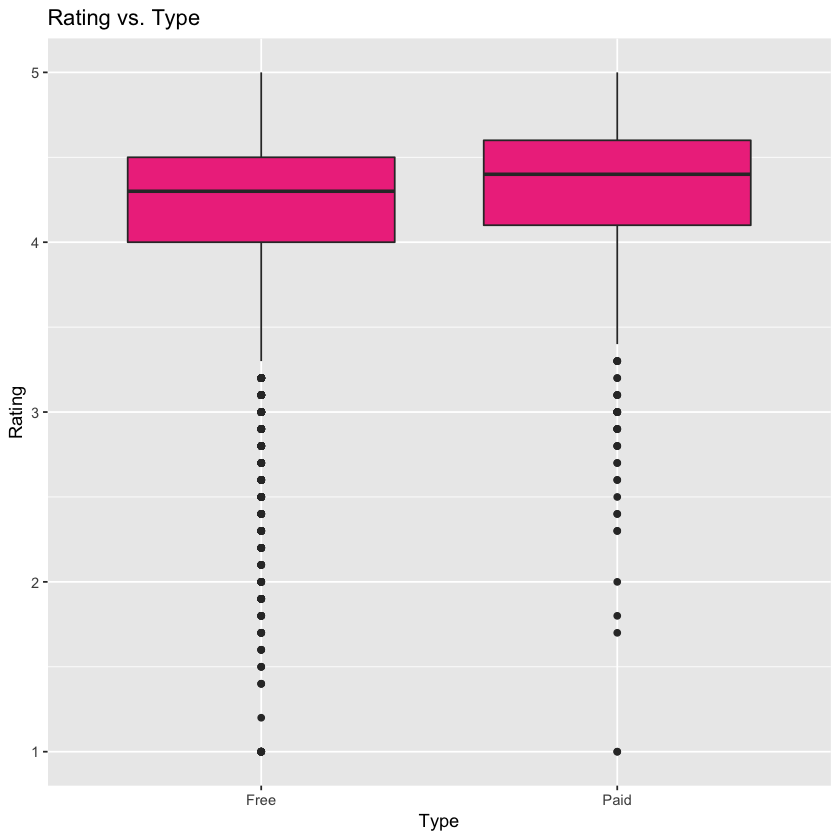

In [21]:
# rating vs. type
ggplot(aes(x = Type, y = Rating), data = df_type )+
  geom_boxplot(fill = 'violetred2' )+
  ggtitle('Rating vs. Type')

# summary pour les apps de Type paid
summary(subset(df, Type == 'Paid')$Rating)

# summary pour les apps de Type free
summary(subset(df, Type == 'Free')$Rating)

> <b><i style="font-size:14pt;">Les applications payantes sont légèrement mieux notées que les applications gratuites.</i></b> 


	Pearson's product-moment correlation

data:  df_size$Rating and df_size$Size
t = 7.3867, df = 7727, p-value = 1.662e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06155742 0.10583402
sample estimates:
       cor 
0.08373705 


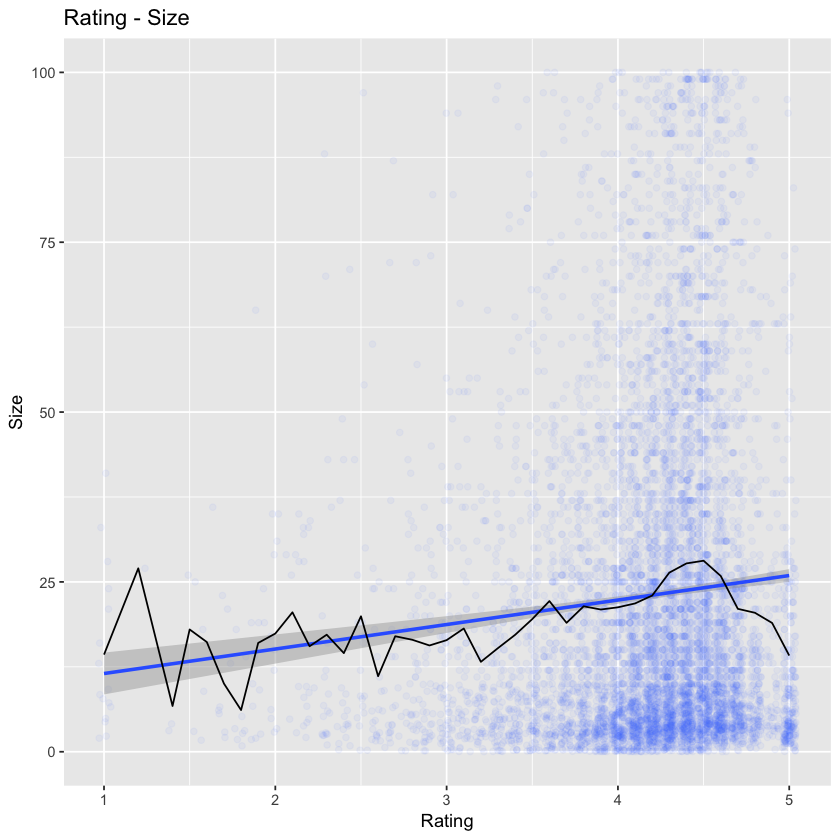

In [22]:
# j'utilise df_size dataframe que j'ai crée avant dans la section pour l'analyse univarié

# rating - size
ggplot(aes(x =Rating , y =Size ), data = df_size)+
  geom_jitter(alpha = 0.05, color ='royalblue1')+
  geom_smooth(method = 'lm')+
  geom_line(stat = 'summary', fun.y = mean  )+
  ggtitle('Rating - Size')

# correlation entre rating et size
cor.test(df_size$Rating,df_size$Size)

> <b><i style="font-size:14pt;">Plus la taille de l'application est grande, plus elle est bien notée.</i></b>

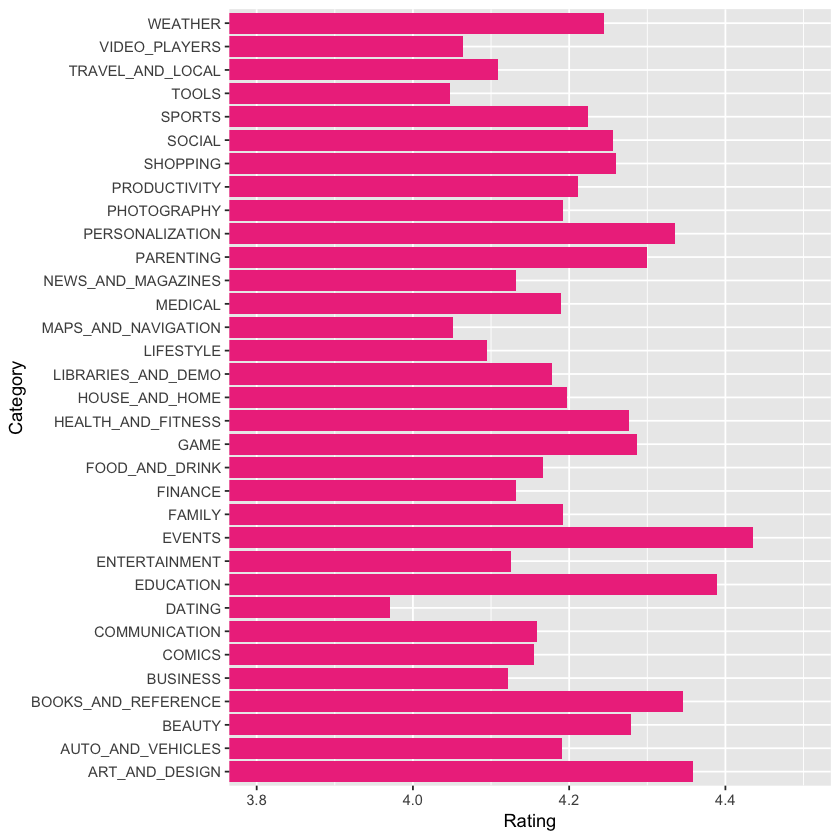

In [23]:
# average rating pour chauque category
dfcat <- subset(df, !is.na(Rating))
dfcat <- dfcat%>%
  group_by(Category)%>%
  dplyr::summarise(Rating = mean(as.numeric(Rating)))

#plot
ggplot(aes(x = Category, y = Rating), data = dfcat)+
  geom_bar(stat="identity", fill = 'violetred2')+
  coord_flip(ylim = c(3.8,4.5))

> <b><i style="font-size:14pt;">Les apps de Dating ont la cote moyenne la plus faible, tandis que les apps Family ont la note la plus moyenne.</i></b>

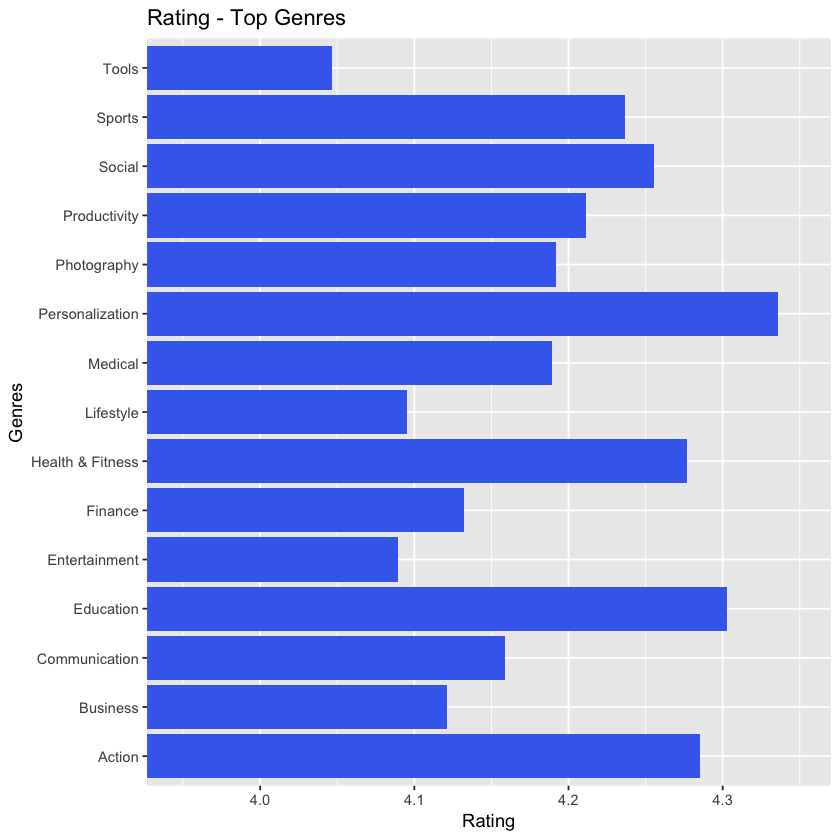

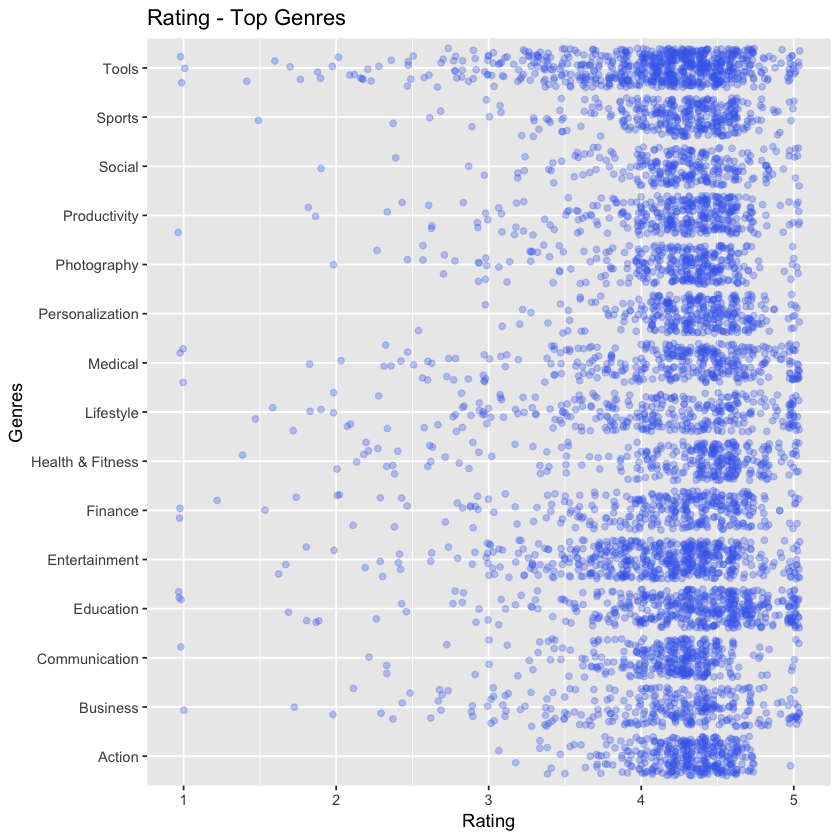

In [24]:
# enlèvement de toute les lignes qui n'ont pas un rating
topgenres <- subset(topgenres, !is.na(Rating))

# group la colonne topgenres 
topgenres_group <- topgenres%>%
  group_by(Genres)%>%
  dplyr::summarise(Rating = mean(as.numeric(Rating)))

# barplot du mean de rating pour les genres les plus frequent
ggplot(aes(x = Genres, y = Rating), data = topgenres_group)+
  geom_bar(stat = 'identity', position = 'dodge', fill = 'royalblue2')+
  coord_flip(ylim = c((min(topgenres_group$Rating) - 0.1),4.35))+
  ggtitle('Rating - Top Genres')

# point plot
ggplot(aes(x = Genres, y = Rating), data = topgenres)+
  geom_jitter(alpha = 0.3, color = 'royalblue2')+
  coord_flip()+
  ggtitle('Rating - Top Genres')

> <b><i style="font-size:14pt;">Lorsque nous examinons les genres les plus populaires, nous constatons que la Personnalization est en moyenne le genre le mieux Rated, suivi par Education.</i></b>

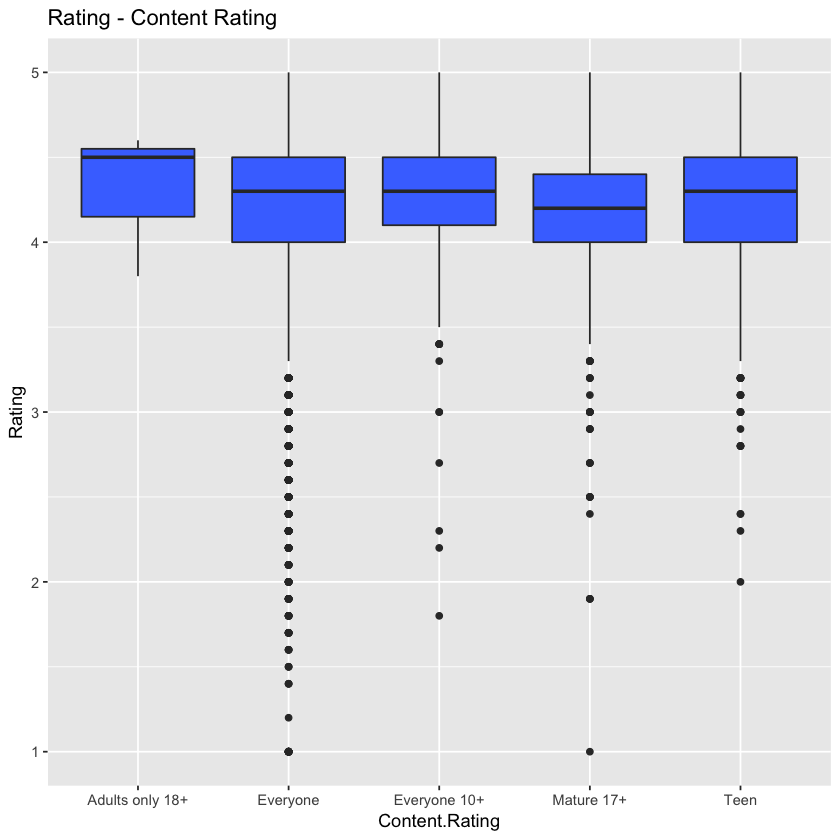

In [25]:
# création d'un boxplot sans le level unrated dans le Content Rating
ggplot(aes(y = Rating, x = Content.Rating),
       data = subset(df, Content.Rating != 'Unrated'))+
  geom_boxplot( fill = 'royalblue1')+
  ggtitle('Rating - Content Rating')

> <b><i style="font-size:14pt;">Les applications dont le Content Rating de mature (17+) ont une cote plus faible.</i></b>

### <b><i style="font-size:14pt;">- La relation entre Genres et Category :</i></b>

<i style="font-size:14pt;">regardons les Genres les plus fréquents et voyons quelles Catégories composent chaque genre</i>

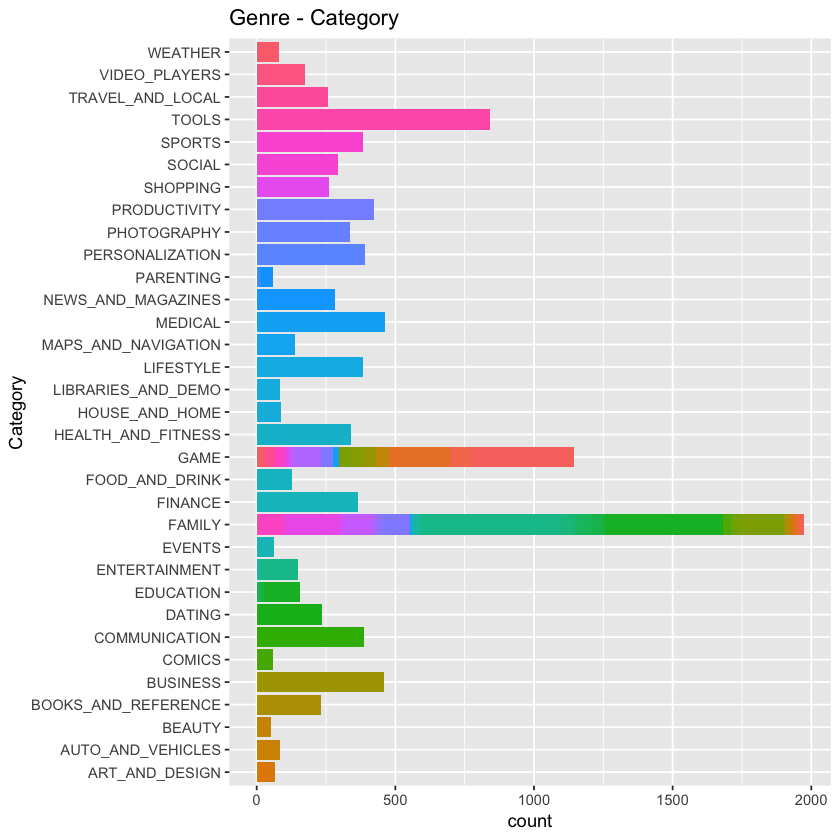

In [26]:
# plot des differents genres que les categories contiennent
ggplot(aes(x = Category), data = df)+
  geom_bar(aes(fill = Genres))+
  coord_flip()+
  theme(legend.position="none")+
  ggtitle('Genre - Category')

> <b><i style="font-size:14pt;">Nous voyons ici que les catégories famille et jeu sont composées de multiples genres, explorons cela plus en détail.</i></b>

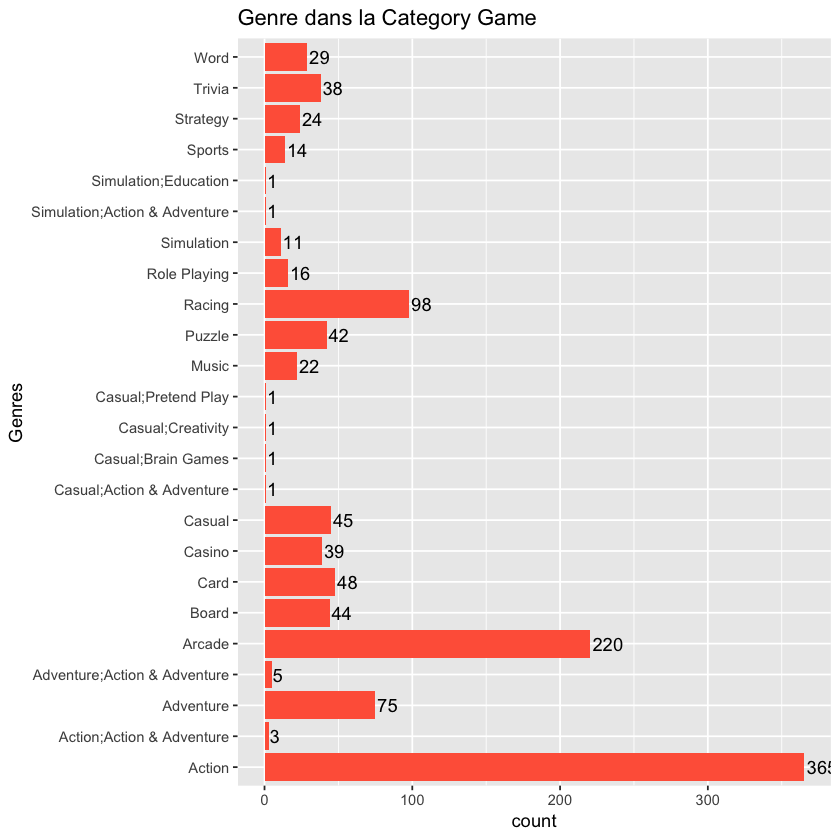

In [27]:
# un dataframe temporaire qui ne sera utilisée qu'une seule fois et qui a le nombre  
# des applications de chaque genre qui composent la catégorie Game
temp <- subset(df, Category == 'GAME')%>%
  group_by(Genres)%>%
  dplyr::summarise(n = n())

# plot
ggplot(aes( x = Genres, y = n), data = temp)+
  geom_bar(stat = 'identity', fill = 'tomato')+
  coord_flip()+
  geom_text(aes(label = n), hjust = -0.1)+
  ggtitle("Genre dans la Category Game")+
  ylab('count')

> <b><i style="font-size:14pt;">Le Genre le plus populaire dans la catégorie Game est Action avec 365 applications par Arcade avec 220 apps et Racing avec 98 apps.</i></b>

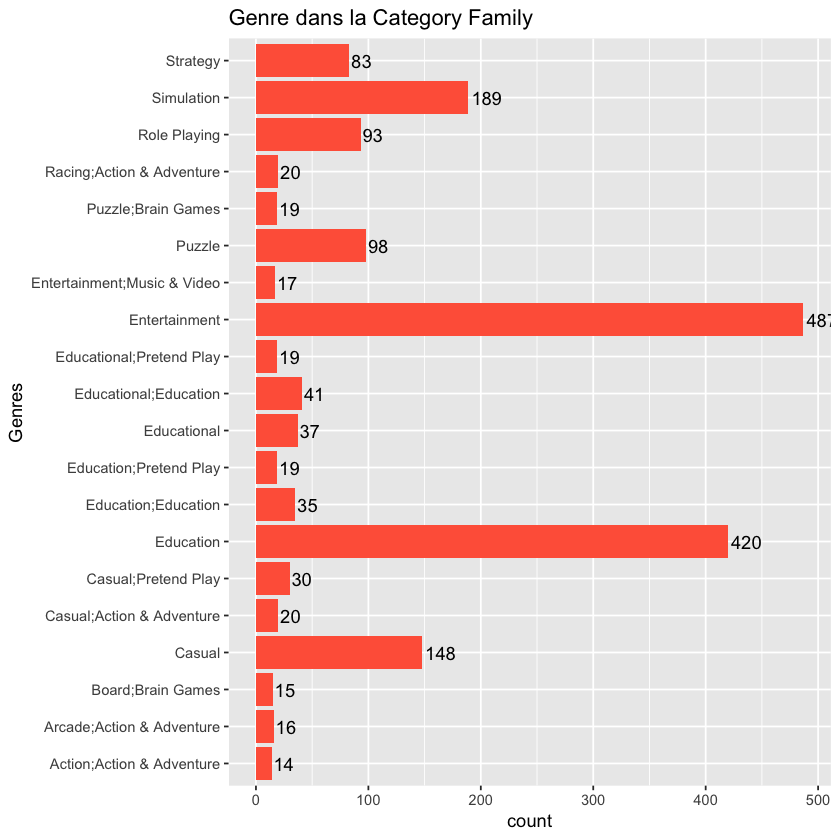

In [28]:
# un dataframe temporaire qui ne sera utilisée qu'une seule fois et qui a le nombre  
# des applications de chaque genre qui composent la catégorie Family
temp <- subset(df, Category == 'FAMILY')%>%
  group_by(Genres)%>%
  dplyr::summarise(n = n())

temp<- temp[order(temp$n, decreasing = TRUE),]
temp <- head(temp, 20)

# plot
ggplot(aes( x = Genres, y = n), data = temp)+
  geom_bar(stat = 'identity', fill = 'tomato')+
  coord_flip()+
  geom_text(aes(label = n), hjust = -0.1)+
  ggtitle("Genre dans la Category Family")+
  ylab('count')

> <b><i style="font-size:14pt;">Voici les 20 principaux genres selon la fréquence qui composent la famille 
 catégorie. Les applications les plus fréquentes dans la catégorie famille sont les applications de divertissement 
 (487), suivi par les applications d'éducation (420) et les applications de simulation (189).</i></b>

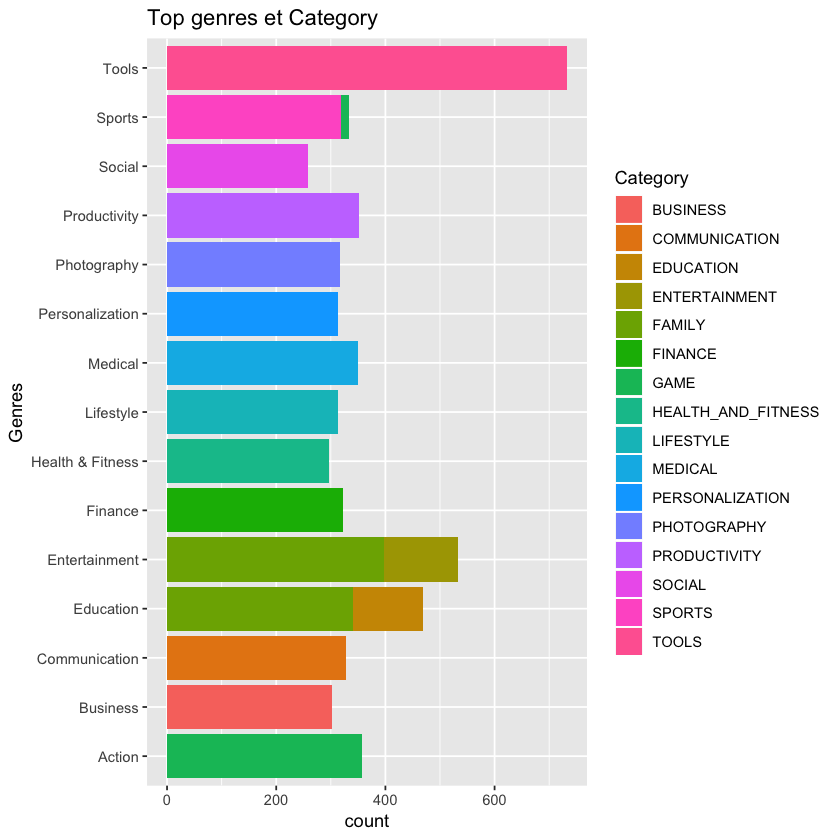

In [29]:
# plot de topgenres et category
ggplot(aes (x = Genres), data = topgenres)+
  geom_bar(aes(fill = Category))+
  coord_flip()+
  ggtitle('Top genres et Category')

> <b><i style="font-size:14pt;">Résultat :<br> On voit ici qu'un genre peut relever de différentes catégories, par exemple la plupart des applications dans le genre divertissement sont dans la catégorie famille bien que il y a une catégorie de divertissement. Nous voyons la même chose avec l'éducation genre ; la plupart des applications dans le genre éducation sont dans la catégorie famille bien qu'il y ait une catégorie pour les applications éducatives.</i></b>

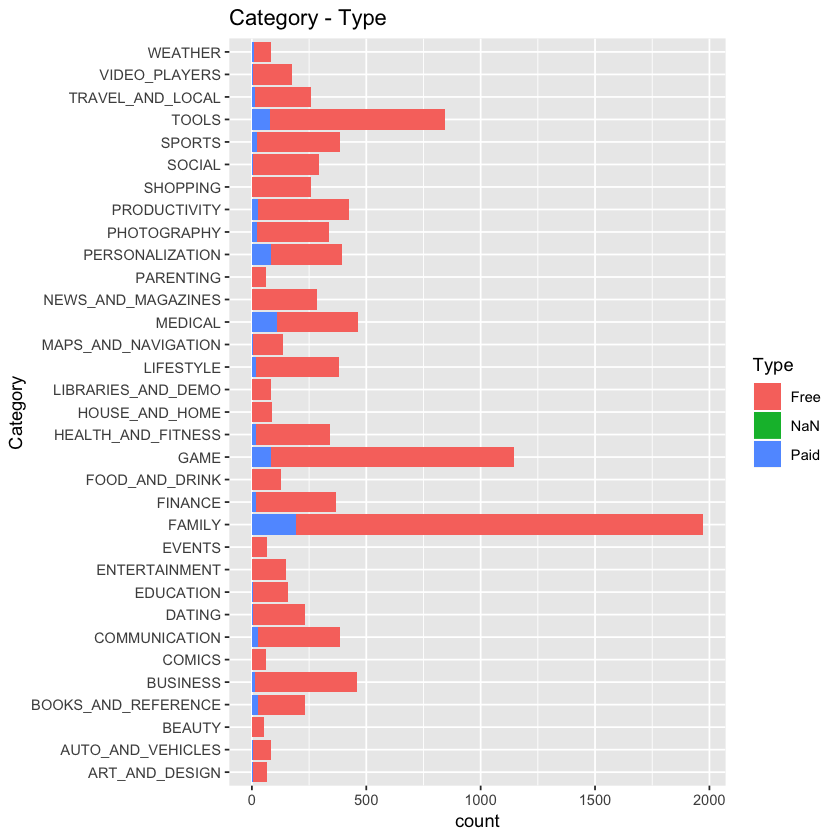

In [30]:
# plot de category par type 
ggplot(aes(x= Category), data = df)+
  geom_bar(aes(fill = Type))+
  coord_flip()+
  ggtitle('Category - Type')

> <b><i style="font-size:14pt;">Aucune application payante n'a été installée plus de ou égale à 50 millions de fois.</i></b>

### <b><i style="font-size:14pt;">- La relation entre Installs et les autres colonnes :</i></b>

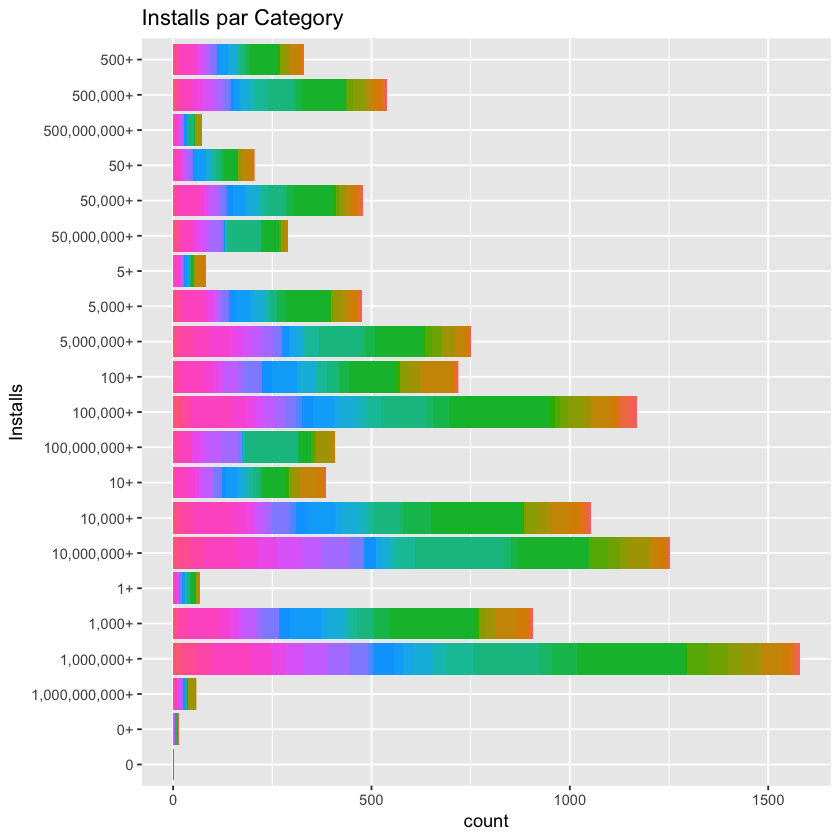

In [31]:
# plot du nbr d'Installs par Category
ggplot(aes(x = Installs), data = df)+
  geom_bar(aes(fill = Category))+
  coord_flip()+
  theme(legend.position="none")+
  ggtitle('Installs par Category')

> <b><i style="font-size:14pt;"> Il ne semble pas que la catégorie affecte le nombre de fois qu'une application serait installé, je suis arrivé à cette conclusion puisqu'il semble que les différents Category sont dans presque tous les niveaux d'installation.</i></b>

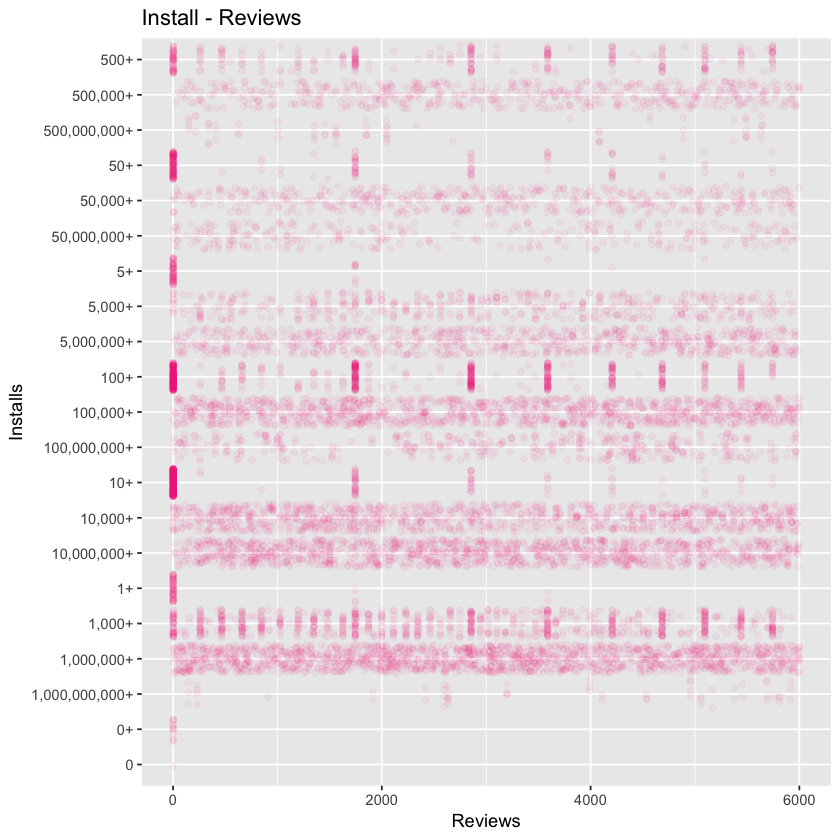

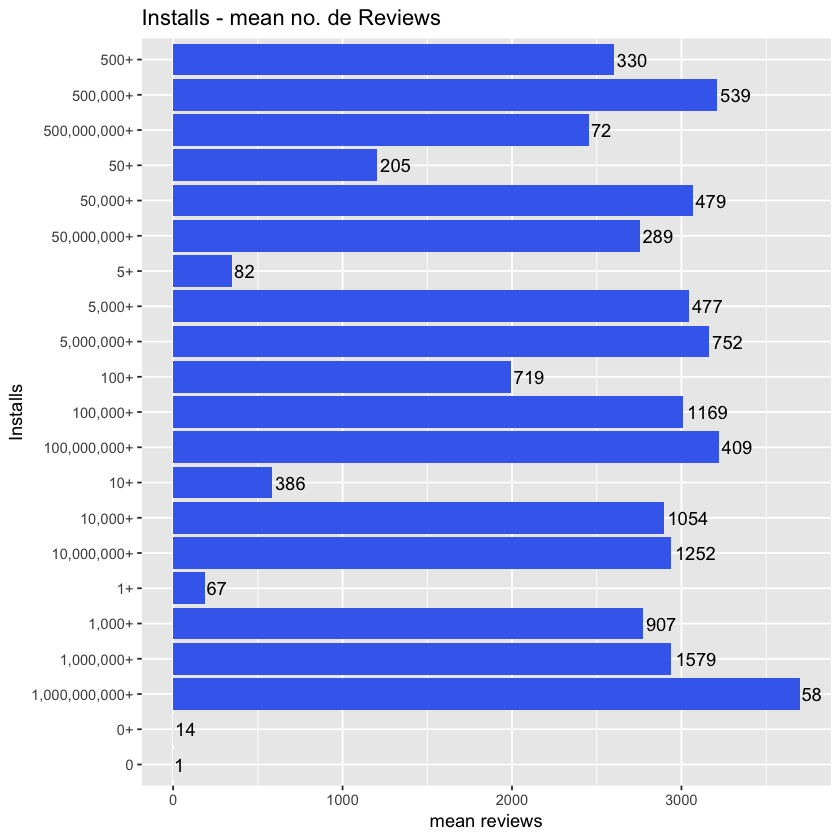

In [32]:
# Installs - Reviews
# temporaire dataset où on groupe le nbr d'Installs
temp <- df%>%
  group_by(Installs)%>%
  dplyr::summarise(mean = mean(Reviews), median = median(Reviews), max = max(Reviews),
            n = n())

ggplot(aes(x=Installs, y = Reviews), data = df)+
  geom_jitter(alpha = 0.05, color = 'violetred2')+
  coord_flip()+
  ggtitle('Install - Reviews')

#install vs. mean reviews
ggplot(aes(x = Installs, y = mean), data = temp)+
  geom_bar(stat = 'identity', fill = 'royalblue2')+
  coord_flip()+
  geom_text(aes(label = n), hjust = -0.1)+
  ggtitle('Installs - mean no. de Reviews')+
  ylab('mean reviews')

### <b><i style="font-size:14pt;">- Relation entre Category and Content Rating : </i></b>

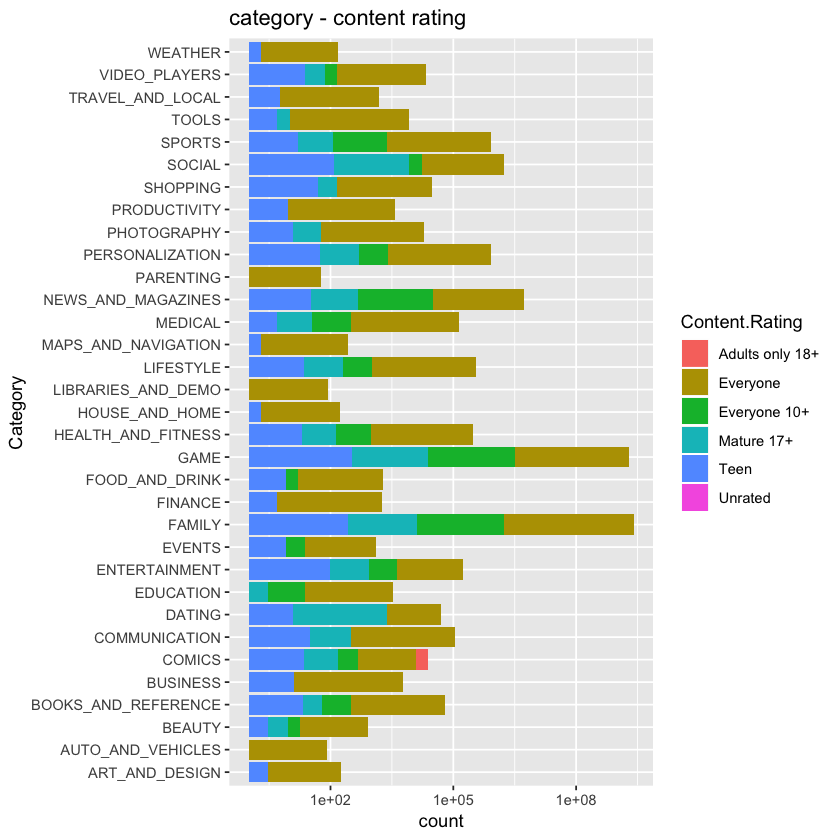

In [33]:
ggplot(aes(x = Category), data = df)+
  geom_bar(aes(fill = Content.Rating))+
  coord_flip()+
  scale_y_log10()+
  ggtitle('category - content rating')

> <b><i style="font-size:14pt;">Les seules applications qui ont un Content Rating de type "Adult only" sont dans la catégorie Comics. La catégorie Dating a le plus grand nombre d'applications ayant un Content Rating "Mature". Chaque catégorie a plus d'une application qui a un Content Rating de "Everyone".</i></b>

> ### <b style="font-size:14pt;"><u>Analyses multivariées :<br></u>( Relation entre les colonnes )</b>

### <b style="font-size:14pt;">Installs et Reviews avec Android version</i></b>

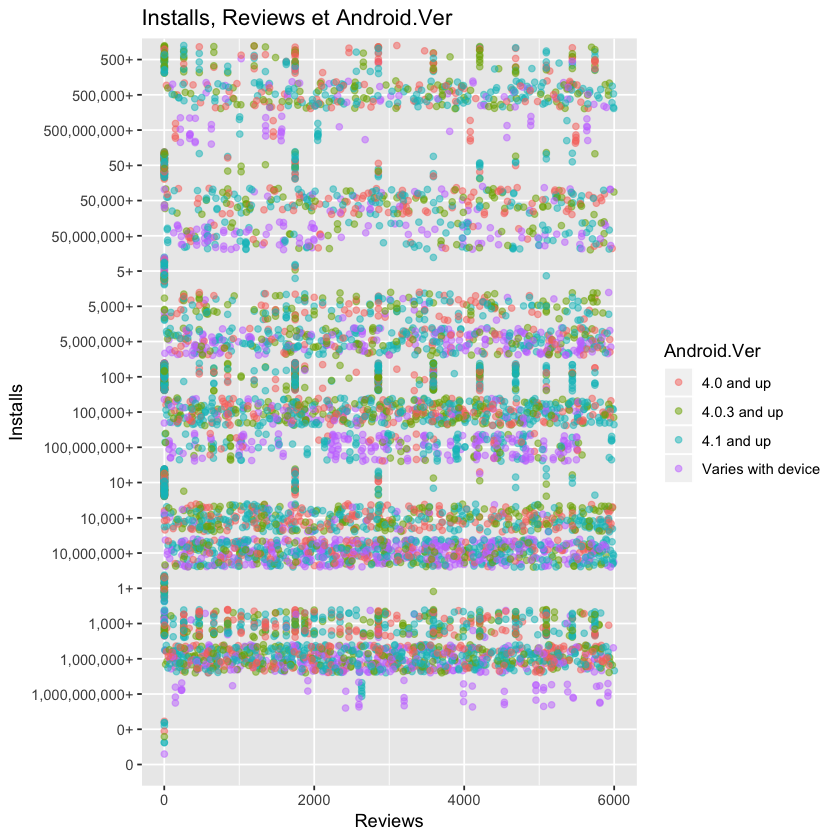

In [34]:
# Android.ver avec plus de 1000 applications
ver_df2 = subset(ver_df, n >1000)

# plot
ggplot(aes(x= Installs, y = Reviews), data = subset(df, df$Android.Ver %in% ver_df2$Android.Ver))+
  geom_jitter(aes(color = Android.Ver), alpha = 0.5)+
  coord_flip()+
  ggtitle('Installs, Reviews et Android.Ver')

> <b style="font-size:14pt;"><i>On voit ici que les applications qui sont pour android version de 4.1 and up sont plus fréquents pour certains nombres de Reviews.</i></b>

<b style="font-size:14pt;"><i>Price et Type avec les autres colonnes :</i></b>

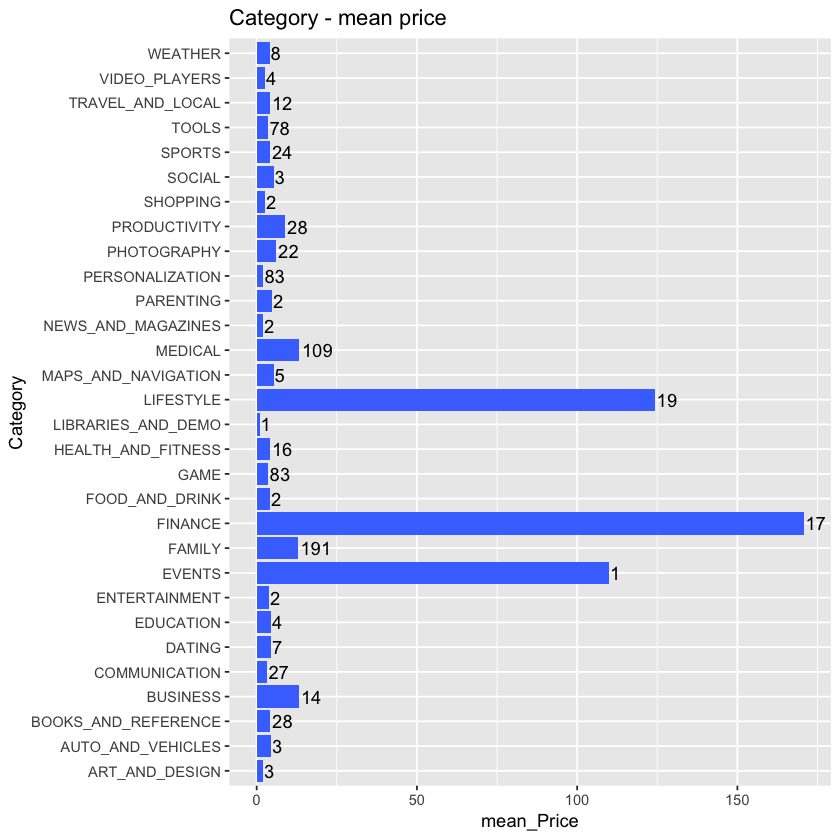

In [35]:
####### IL FAUT UN CLEAN POUR QUE ÇA MARCHE

# sous-ensemble pour Type
paidapp <- subset(df, Type == "Paid")

paidappgroup <- paidapp%>%
  group_by(Category)%>%
  dplyr::summarise(mean_Price = mean(Price), n = n(), median_Price = median(Price))

# Category - mean_price
ggplot(aes(x =Category, y =mean_Price ), data = paidappgroup)+
  geom_bar(stat = 'identity', position = 'dodge', fill = 'royalblue1')+
  coord_flip()+
  geom_text(aes(label = n), hjust=-0.1)+
  ggtitle('Category - mean price')

> <b style="font-size:14pt;"><i>The numbers right next to the end of each bar is the number of paid applications in that category When we look at the bar plot above we see that finance applications are the most expensive applications on the google app store. I want to explore this further I am going to now plot the median Price for all the categories and a point plot with the Price on a logarithmic scale to get a better idea of what is happening.</i></b>

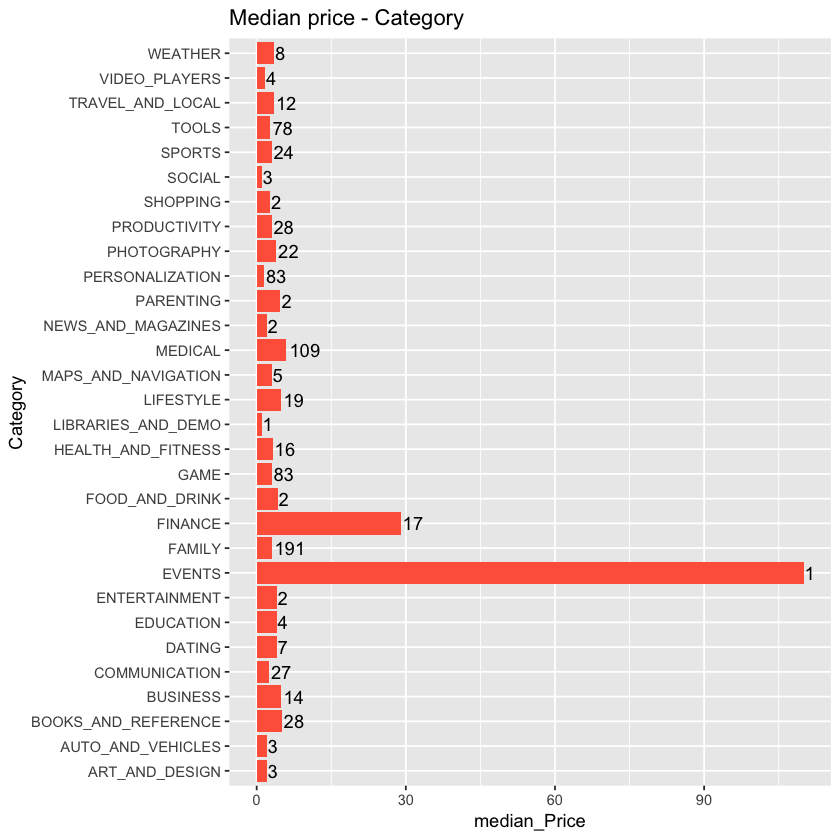

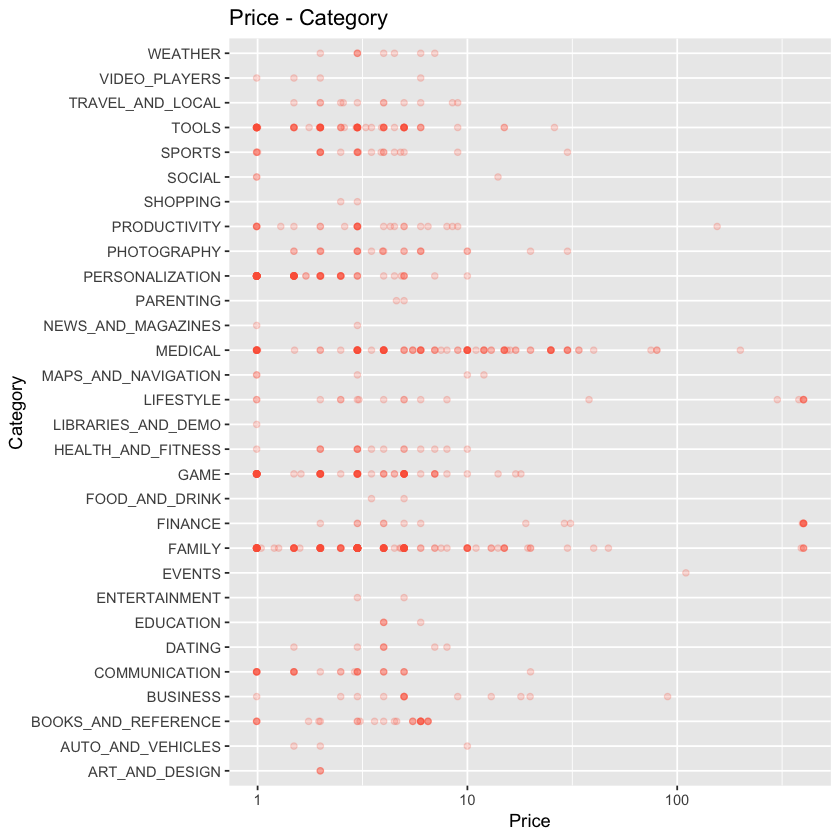

In [36]:
# Relation entre la median de Price et category
ggplot(aes(x =Category, y = median_Price ), data = paidappgroup)+
  geom_bar(stat = 'identity', position = 'dodge', fill = 'tomato')+
  coord_flip()+
  geom_text(aes(label = n), hjust=-0.1)+
  ggtitle('Median price - Category')

# relation entre price et category lors de la comptabilisation du type
ggplot(aes(y = Price, x = Category), data = paidapp)+
  geom_point(alpha = 0.2, color = 'tomato')+
  coord_flip()+
  scale_y_log10()+
  ggtitle('Price - Category')

In [37]:
# Regardons l'app la plus cher dans la category Finance
temp <- head(subset(df, Category == 'FINANCE' & Type == 'Paid'))%>%
  select(App, Category, Price, Genres)

outliers <- temp[order(temp$Price, decreasing = TRUE),]%>%
  head(5)

outliers

App                            Category Price  Genres 
5357 I Am Rich Premium              FINANCE  399.99 Finance
5359 I am Rich!                     FINANCE  399.99 Finance
5360 I am rich(premium)             FINANCE  399.99 Finance
5365 I am rich (Most expensive app) FINANCE  399.99 Finance
5370 I am Rich                      FINANCE  399.99 Finance

> <b style="font-size:14pt;"><i>I found that this is due to the apps that were meant to show off wealth if we were to not count these apps as part of our statistic; if we were to assume that they do not have a practical purpose and were not meant to be taken seriously this will lead us to the conclusion that the mean/median Price is
    a lot lower.</i></b>

In [38]:
# Regardons l'app la plus cher dans la category LifeStyle
temp <- subset(df, Category == 'LIFESTYLE' & Type == 'Paid')%>%
  select(App, Category, Price, Genres)

temp[order(temp$Price, decreasing = TRUE),]%>%
  head(5)

App                                   Category  Price  Genres   
4368 I'm Rich - Trump Edition              LIFESTYLE 400.00 Lifestyle
4363 \U0001f48e I'm rich                   LIFESTYLE 399.99 Lifestyle
5352 I am rich                             LIFESTYLE 399.99 Lifestyle
9935 I'm Rich/Eu sou Rico/أنا غني/我很有錢 LIFESTYLE 399.99 Lifestyle
5358 I am extremely Rich                   LIFESTYLE 379.99 Lifestyle

> <b style="font-size:14pt;"><i>In the lifestyle category we see that these same sort of applications is distorting our statistic.</i></b>

In [39]:
# check the app in the events category
subset(df, Category == 'EVENTS' & Type == 'Paid')%>%
  select(App,Category,Price, Genres)

App                     Category Price  Genres
6625 BP Fitness Lead Scanner EVENTS   109.99 Events

> <b style="font-size:14pt;"><i>In the events category there is only one paid app and that app has only been installed between 1-5 times. If we were to visually
inspect the point plot we would see that on average the medical apps are actually more expensive on average.</i></b>

### <b style="font-size:14pt;"><i>Check which category has the highest rating</i></b>

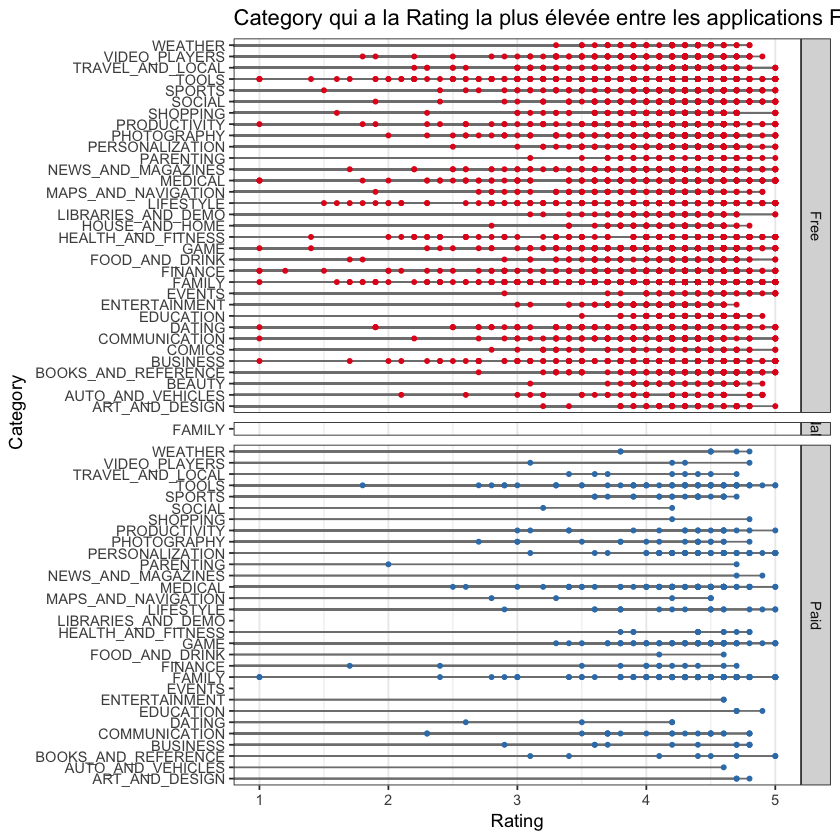

In [40]:
ggplot(df, aes(x=Rating, y=Category)) +
  geom_segment(aes(yend=Category), xend=0, colour="grey50") +
  geom_point(size=1, aes(colour=Type)) +
  scale_colour_brewer(palette="Set1", limits=c("Free", "Paid"), guide=FALSE) +
  theme_bw() +
  theme(panel.grid.major.y = element_blank()) +
  facet_grid(Type ~ ., scales="free_y", space="free_y") +
  ggtitle("Category qui a la Rating la plus élevée entre les applications Free et Paid")

> <b style="font-size:14pt;"><i>Number of ratings :</i></b>

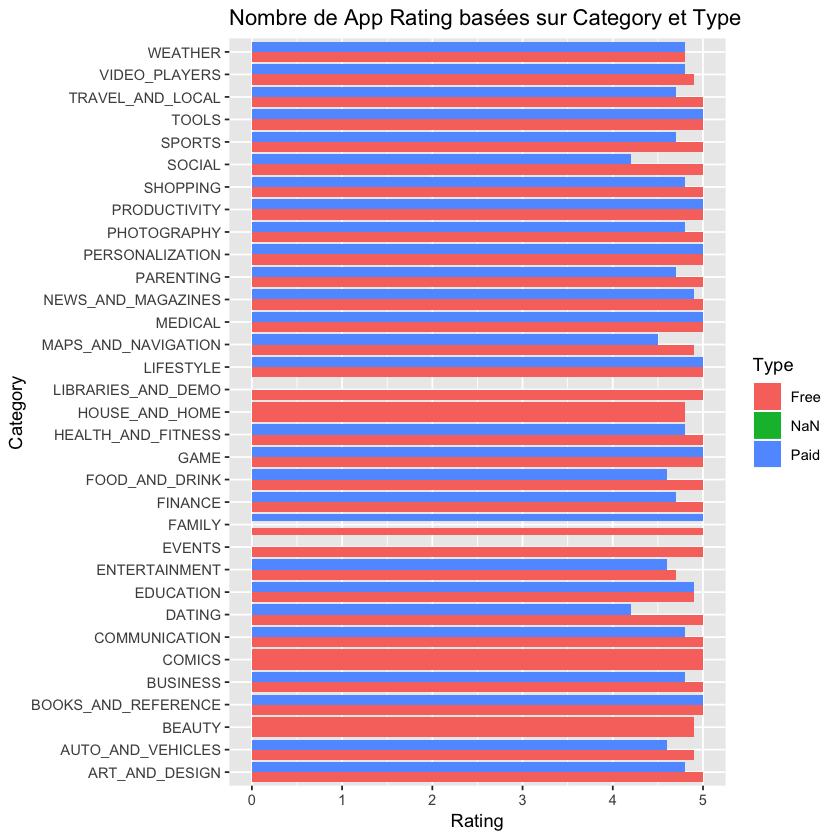

In [41]:
ggplot(df, aes(x= Category, y= Rating, fill = Type)) +
  geom_bar(position='dodge',stat='identity') +
  coord_flip() +
  ggtitle("Nombre de App Rating basées sur Category et Type")

> <b style="font-size:14pt;"><i>Number of Reviews :</i></b>

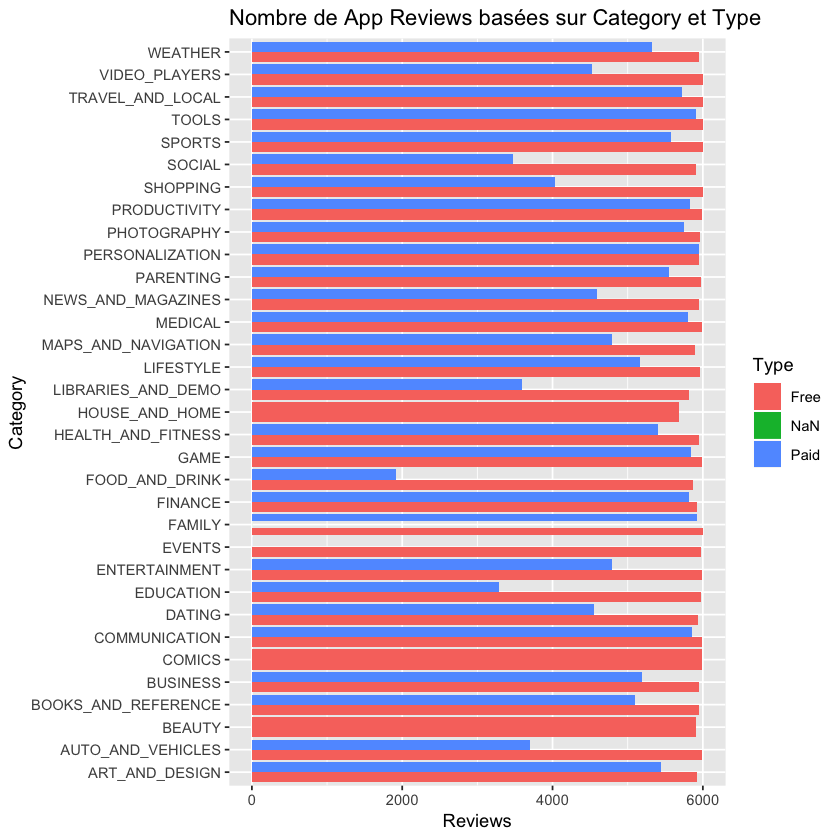

In [42]:
ggplot(df, aes(x= Category, y= Reviews, fill = Type)) +
  geom_bar(position='dodge',stat='identity') +
  coord_flip() +
  ggtitle("Nombre de App Reviews basées sur Category et Type")